# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

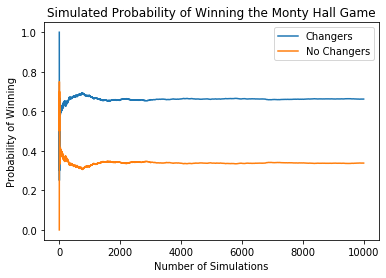

In [19]:
# Your code here
n_tests = 10**4
no_changed_doors = []
changed_doors = []

for x in range(n_tests):
    # generate a random integer between one and three to represent the door hiding the car.
    car_door = np.random.randint(1,4)
    # Then, generate a second integer between one and three representing the player's selection.
    p_sel = np.random.randint(1,4)
    # Then, of those the contestant did not choose, select a door concealing a goat to reveal.
    remaining_goat_door = [x for x in [1,2,3] if x not in [car_door, p_sel]]
    reveal_goat_door = np.random.choice(remaining_goat_door)
    # Record the results of the simulated game if they changed versus if they did not.
    change_door = [door for door in [1,2,3] if door not in [p_sel, reveal_goat_door]][0]
    if p_sel == car_door:
        no_changed_doors.append(1)
    else:
        no_changed_doors.append(0)
    if change_door == car_door:
        changed_doors.append(1)
    else:
        changed_doors.append(0)

# Repeat this process a thousand (or more) times. 
# Finally, plot the results of your simulation as a line graph.

# Plot for the changers
xs_c = np.linspace(1, n_tests, n_tests)
xs_nc = xs_c
# Because the mean of binomial data is the proportion of successes!
ys_c = [np.mean(changed_doors[:i]) for i in range(1,n_tests+1)]
ys_nc = [np.mean(no_changed_doors[:i]) for i in range(1,n_tests+1)]
plt.plot(xs_c, ys_c, label='Changers')
plt.plot(xs_nc, ys_nc, label='No Changers')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Simulations')
plt.title('Simulated Probability of Winning the Monty Hall Game')
plt.legend();

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 